In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = '/home/user/netology/names'

In [17]:
def names_dynamics(names, step = 5):
    cols = ['Name','Gender','Count']
    query = 'Name == [{}]'.format(', '.join('"{0}"'.format(w) for w in names))
    names_by_year = {}
    for year in range(1900, 2001, step):
        names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols).query(query)
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum().unstack('Name')

def count_top(years, filter=None, limit=3):
    cols = ['Name','Gender','Count']
    names_array = []
    for year in years:
        names = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
        names_array.append(names)
    names_all = pd.concat(names_array, names=['Year', 'Pos'])
    if filter:
        names_all = names_all[filter]
    return names_all.groupby('Name').sum().sort_values(by='Count', ascending=False).head(limit)

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

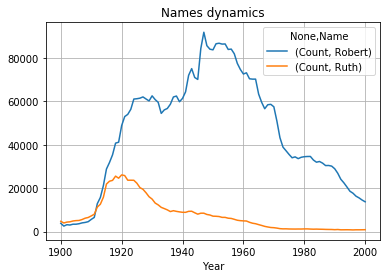

In [4]:
names_dynamics(['Ruth', 'Robert'], step=1).plot(title='Names dynamics', grid=True)

2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

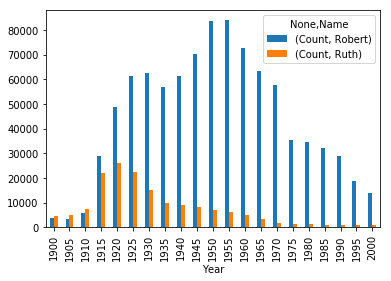

In [5]:
names_dynamics(['Ruth', 'Robert']).plot.bar()

3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

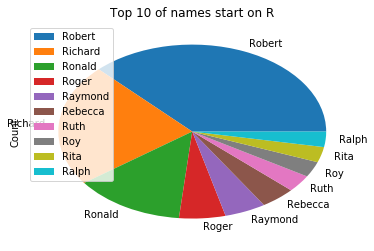

In [21]:
top_r_names = count_top([1950], filter=lambda x: x.Name.str.startswith("R"), limit=10)
top_r_names.plot.pie(title='Top 10 of names start on R', y='Count')

4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [61]:
CONSONANTS = list("bcdfghjklmnpqrstvxzwy")

def count_consonants(word):
    return sum(word.lower().count(c) for c in CONSONANTS)

cols = ['Name','Gender','Count']
names_by_year = {}
for year in range(1900, 2001, 1):
    names_by_year[year] = pd.read_csv('{}/yob{}.txt'.format(DATA_PATH, year), names=cols)
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
#names_all.groupby('Name').sum().head(10)
names1=names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum().head(10).reset_index()#.unstack('Name')
#names1
names1['Consonants'] = names1.apply(lambda row: count_consonants(row.Name), axis=1)
names1

,Year,Name,Count,Consonants
0,1900,Aaron,103,2
1,1900,Abbie,112,2
2,1900,Abby,7,3
3,1900,Abe,56,1
4,1900,Abel,15,2
5,1900,Abigail,14,3
6,1900,Abner,21,3
7,1900,Abraham,100,4
8,1900,Abram,18,3
9,1900,Abron,5,3
